In [5]:
# STEP 1: Import Required Libraries

In [6]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [7]:
# STEP 5: Load the Dataset
df = pd.read_csv("combined_emails_with_natural_pii.csv")

In [8]:
# 3. PII Masking using SpaCy (NER for names, emails, phones)
nlp = spacy.load("en_core_web_sm")

def mask_pii(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE', 'EMAIL', 'PHONE_NUMBER']:
            text = text.replace(ent.text, "[PII]")
    return text

df['email_cleaned'] = df['email'].apply(mask_pii)


In [9]:
# 4. Text Cleaning (Remove special characters, numbers, multiple spaces)
def clean_text(text):
    text = re.sub(r'\n+', ' ', text)  # new lines
    text = re.sub(r'\W', ' ', text)   # non-words
    text = re.sub(r'\d+', '', text)   # numbers
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()  # extra spaces
    return text

df['email_cleaned'] = df['email_cleaned'].apply(clean_text)
df[['email', 'email_cleaned', 'type']].head()


,email,email_cleaned,type
0,Subject: Unvorhergesehener Absturz der Datenan...,subject unvorhergesehener pii der pii brach un...,Incident
1,Subject: Customer Support Inquiry\n\nSeeking i...,subject customer support inquiry seeking infor...,Request
2,Subject: Data Analytics for Investment\n\nI am...,subject pii i am contacting you to request inf...,Request
3,Subject: Krankenhaus-Dienstleistung-Problem\n\...,subject pii pii trat aufgrund unerlaubten pii ...,Incident
4,"Subject: Security\n\nDear Customer Support, I ...",subject security dear customer support i am re...,Request


In [10]:
df.head()

,email,type,email_cleaned
0,Subject: Unvorhergesehener Absturz der Datenan...,Incident,subject unvorhergesehener pii der pii brach un...
1,Subject: Customer Support Inquiry\n\nSeeking i...,Request,subject customer support inquiry seeking infor...
2,Subject: Data Analytics for Investment\n\nI am...,Request,subject pii i am contacting you to request inf...
3,Subject: Krankenhaus-Dienstleistung-Problem\n\...,Incident,subject pii pii trat aufgrund unerlaubten pii ...
4,"Subject: Security\n\nDear Customer Support, I ...",Request,subject security dear customer support i am re...


In [11]:
# 5. Encode Labels
df['label'] = df['type'].astype('category').cat.codes
df[['type', 'label']].drop_duplicates()


,type,label
0,Incident,1
1,Request,3
7,Problem,2
16,Change,0


In [12]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['email_cleaned'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])


In [13]:
# 7. Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [14]:
# 8. Train Classifier (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


Accuracy Score: 0.7489583333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.84       504
           1       0.68      0.86      0.76      1917
           2       0.55      0.29      0.38      1007
           3       0.88      0.93      0.90      1372

    accuracy                           0.75      4800
   macro avg       0.76      0.71      0.72      4800
weighted avg       0.74      0.75      0.73      4800



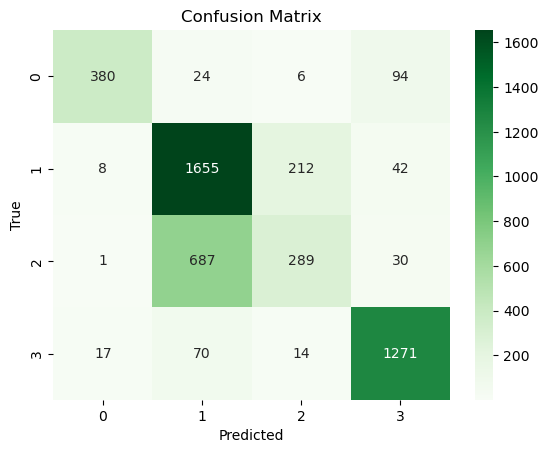

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# 9. Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       504
           1       0.68      0.86      0.76      1917
           2       0.55      0.29      0.38      1007
           3       0.88      0.93      0.90      1372

    accuracy                           0.75      4800
   macro avg       0.76      0.71      0.72      4800
weighted avg       0.74      0.75      0.73      4800



In [20]:
df["type"].value_counts()


type
Incident    9586
Request     6860
Problem     5037
Change      2517
Name: count, dtype: int64

In [21]:
TfidfVectorizer(ngram_range=(1, 2))


TfidfVectorizer(ngram_range=(1, 2))

In [22]:
TfidfVectorizer(stop_words='english')


TfidfVectorizer(stop_words='english')

In [23]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_preds = nb_model.predict(X_test_tfidf)
print("🔹 MultinomialNB Report:\n", classification_report(y_test, nb_preds))


🔹 MultinomialNB Report:
               precision    recall  f1-score   support

           0       0.89      0.47      0.62       504
           1       0.64      0.92      0.76      1917
           2       0.50      0.14      0.22      1007
           3       0.84      0.92      0.88      1372

    accuracy                           0.71      4800
   macro avg       0.72      0.61      0.62      4800
weighted avg       0.69      0.71      0.66      4800



In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train)
xgb_preds = xgb_model.predict(X_test_tfidf)
print("🔹 XGBoost Report:\n", classification_report(y_test, xgb_preds))


C:\Users\Avesh kharani\anaconda4\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:18:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78       504
           1       0.67      0.89      0.76      1917
           2       0.58      0.24      0.34      1007
           3       0.86      0.92      0.89      1372

    accuracy                           0.74      4800
   macro avg       0.76      0.68      0.69      4800
weighted avg       0.73      0.74      0.71      4800



In [31]:
!pip install xgboost lightgbm

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_tfidf, y_train)

lgbm_preds = lgbm_model.predict(X_test_tfidf)
print("🔹 LightGBM Report:\n", classification_report(y_test, lgbm_preds))


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.5 MB 393.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.5 MB 409.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.5 MB 654.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.5 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.1 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 1.7 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.5 MB 1.8 MB/s eta 0:00:01
   ---------------

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=3)
search.fit(X_train_tfidf, y_train)

best_model = search.best_estimator_


In [36]:
print(best_model)

RandomForestClassifier(min_samples_split=5, random_state=42)


In [37]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42,min_samples_split=5)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', LGBMClassifier())
], voting='soft')

voting_model.fit(X_train_tfidf, y_train)


C:\Users\Avesh kharani\anaconda4\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166545
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 3337
[LightGBM] [Info] Start training from score -2.255284
[LightGBM] [Info] Start training from score -0.917724
[LightGBM] [Info] Start training from score -1.561144
[LightGBM] [Info] Start training from score -1.252346


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importan...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm', LGBMClassifier())],
                 voting='soft')

In [ ]:
 df['email_cleaned'], df['label']

In [41]:
X=df['email_cleaned']

In [42]:
y=df['label']

In [45]:
X_tfidf = tfidf.fit_transform(X)

In [46]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# ✅ Define the CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ Define model and hyperparameters
rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# ✅ Run RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, rf_params, cv=cv, scoring='accuracy', n_iter=10, n_jobs=-1)
rf_search.fit(X_tfidf, y)

print("✅ Random Forest Best Accuracy:", rf_search.best_score_)
print("Best Params:", rf_search.best_params_)


✅ Random Forest Best Accuracy: 0.7369583333333333
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [50]:
from sklearn.svm import SVC

svm_model = SVC(C=1.0, kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)

SVC()

In [53]:
from sklearn.metrics import classification_report

y_pred = svm_model.predict(X_test_tfidf)

print("✅ SVM Classification Report:")
print(classification_report(y_test, y_pred))

✅ SVM Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       504
           1       0.40      0.95      0.56      1917
           2       0.21      0.02      0.04      1007
           3       0.46      0.05      0.08      1372

    accuracy                           0.40      4800
   macro avg       0.35      0.26      0.17      4800
weighted avg       0.37      0.40      0.26      4800



In [54]:
import joblib

In [58]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder and fit it on the target variable 'type'
le = LabelEncoder()
y = le.fit_transform(df['type'])  # Assuming 'type' is the target label column



In [55]:
# Save the model and vectorizer using joblib
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

In [59]:
import sklearn
print(sklearn.__version__)


1.5.2


In [62]:
df['type'].value_counts()


type
Incident    9586
Request     6860
Problem     5037
Change      2517
Name: count, dtype: int64

In [66]:
import numpy as np
print(np.__version__)

1.26.4


In [67]:
import sklearn, numpy, joblib
print(sklearn.__version__)
print(numpy.__version__)
print(joblib.__version__)


1.5.2
1.26.4
1.4.2


In [68]:
import pandas as pd
print(pd.__version__)

2.2.3


In [70]:
import sys
print(sys.version)



3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
